<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/2e_NOME_Enriched_Heatmap_with_MNase_and_Etv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examine the nucleosome profiles at Etv2 binding sites at D1 MEF on Etv2 induction
by Wuming Gong



This notebook examines the MEF MNase-seq signal at the Etv2 binding sites at MEF D1 post Etv2 induction.  The anaysis shows that Etv2 binds both NFR and NOR regions

In [1]:
start_time0 <- Sys.time()
options(max.print=1000)

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

## Install R packages

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  'devtools',
  'GenomicRanges', 'rtracklayer', 
  'BSgenome.Mmusculus.UCSC.mm10',
  'EnrichedHeatmap',  'circlize'
)

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'GenomicRanges', 'rtracklayer',
  'BSgenome.Mmusculus.UCSC.mm10', 'EnrichedHeatmap', 'circlize'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘iterators’, ‘GenomeInfoDbData’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘rjson’, ‘clue’, ‘png’, ‘Cairo’, ‘foreach’, ‘doParallel’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’, ‘XML’, ‘Biostrings’, ‘zlibbioc’, ‘RCurl’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘BSgenome’, ‘ComplexHeatmap’, ‘matrixStats’, ‘GetoptLong’, ‘locfit’, ‘GlobalOptions’, ‘shape’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms

In [7]:
BiocManager::install(c('Gviz','limma','Repitools'))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'Gviz', 'limma', 'Repitools'

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘xtable’, ‘affyio’, ‘preprocessCore’, ‘filelock’, ‘plogr’, ‘lazyeval’, ‘Formula’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘annotate’, ‘affy’, ‘BiocFileCache’, ‘RSQLite’, ‘KEGGREST’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Hmisc’, ‘dichromat’, ‘VariantAnnotation’, ‘jpeg’, ‘gtools’, ‘caTools’, ‘genefilter’, ‘vsn’, ‘truncnorm’, ‘biomaRt’, ‘AnnotationDbi’, ‘GenomicFeatures’, ‘ensembldb’, ‘biovizBase’, ‘latticeExtra’, ‘gplots’, ‘gsmoothr’, ‘edgeR’, ‘DNAcopy’, ‘Ringo’, ‘Rsolnp’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat

## Load R packages

In [8]:
library(GenomicRanges)
library(dplyr)
library(BSgenome.Mmusculus.UCSC.mm10)
library(SummarizedExperiment)
library(ggplot2)
library(EnrichedHeatmap)
library(circlize) # colorRamp2
library(devtools)
library(Repitools)
library(Gviz)
library(limma)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

# Installing R-package aaron

In [9]:
devtools::install_github('dsouz072/aaRon')

stringi    (1.7.4  -> 1.7.5 ) [CRAN]
pillar     (1.6.2  -> 1.6.3 ) [CRAN]
lifecycle  (1.0.0  -> 1.0.1 ) [CRAN]
plyr       (NA     -> 1.8.6 ) [CRAN]
tibble     (3.1.4  -> 3.1.5 ) [CRAN]
digest     (0.6.27 -> 0.6.28) [CRAN]
data.table (1.14.0 -> 1.14.2) [CRAN]
reshape2   (NA     -> 1.4.4 ) [CRAN]
zoo        (NA     -> 1.8-9 ) [CRAN]


Skipping 11 packages not available: Gviz, Repitools, limma, rtracklayer, IRanges, Biostrings, Rsamtools, S4Vectors, GenomeInfoDb, GenomicAlignments, GenomicRanges

Installing 9 packages: stringi, pillar, lifecycle, plyr, tibble, digest, data.table, reshape2, zoo

Installing packages into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)



✔  checking for file ‘/tmp/RtmpKxCsju/remotes4f5dc18cd8/dsouz072-aaRon-4884e27/DESCRIPTION’
─  preparing ‘aaRon’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘aaRon_0.9.5.tar.gz’
   


Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)



In [10]:
library(aaRon)


Attaching package: 'aaRon'


The following object is masked from 'package:limma':

    plotDensities


The following object is masked from 'package:BiocGenerics':

    unstrand


The following object is masked from 'package:base':

    q




## Read the Etv2 ChIP-seq peaks at D1 MEF reprogramming

In [11]:
all_etv2_peaks_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
gr <- readRDS(gzcon(url(all_etv2_peaks_url)))
gr
colnames(gr$group)

GRanges object with 162010 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3263790-3263989      * | /panfs/roc/scratch/g..   8.36521
       [3]     chr1   3344682-3344881      * | /panfs/roc/scratch/g..   9.73217
       [4]     chr1   3460640-3460839      * | /panfs/roc/scratch/g..   3.92081
       [5]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       ...      ...               ...    ... .                    ...       ...
  [162006]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [162007]     chrY 90836259-90836458      * | /panfs/roc/scratch/g..   8.27339
  [162008]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [162009]     chrY 90842563-90842762      * | /panfs/roc/scra

[1] "MEF_Dox_d1_Etv2" "MEF_Dox_d2_Etv2" "MEF_Dox_d7_Etv2" "EB_Dox_3h_Etv2" 
[5] "EB_Dox_12h_Etv2"

In [12]:
peaks <- gr[gr$group[, 'MEF_Dox_d1_Etv2']]
seqlevels(peaks) <- seqlevels(BSgenome.Mmusculus.UCSC.mm10)
seqlengths(peaks) <- seqlengths(BSgenome.Mmusculus.UCSC.mm10)
seqinfo(peaks) <- seqinfo(BSgenome.Mmusculus.UCSC.mm10)
peaks

GRanges object with 123337 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       [3]     chr1   3531626-3531825      * | /panfs/roc/scratch/g..  16.22768
       [4]     chr1   3671125-3671324      * | /panfs/roc/scratch/g..   6.73792
       [5]     chr1   3671746-3671945      * | /panfs/roc/scratch/g..   9.54304
       ...      ...               ...    ... .                    ...       ...
  [123333]     chrY 90828479-90828678      * | /panfs/roc/scratch/g..  20.49355
  [123334]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [123335]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [123336]     chrY 90842563-90842762      * | /panfs/roc/scra

## Download related `pileup` and `fold enrichment` bigwig files

`rtracklayer::import` does not support importing bigwig files with URL starting with 'https://'. We need to download the bigwig files first.

In [13]:
bw_files <- c('MEF_Dox_D1_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_FE.bw',
	'MNase' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/MNase_treat_pileup.bw')

In [14]:
for (i in 1:length(bw_files)){
  sprintf('wget -x -c -nH %s', bw_files[i]) %>% system()
}
local_bw_files <- gsub('https://s3.msi.umn.edu/', './', bw_files)

In [15]:
message(sprintf('all local_bw_files exist: %s', all(file.exists(local_bw_files))))

all local_bw_files exist: TRUE



## Prepare normalized matrix for `EnrichedHeatmap`

In [16]:
sprintf('number of Etv2 peaks in MEFS: %d', length(peaks)) %>% message()

number of Etv2 peaks in MEFS: 123337



In [17]:
extend <- 1000
w <- 50
smooth <- FALSE
target_ratio <- 0.2
target_width <- width(peaks)[1]
message(sprintf('target width: %d\n', target_width))

target width: 200




In [18]:
mat <- lapply(local_bw_files, function(bw_file){
  cvg <- rtracklayer::import(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(peaks, fix = 'center', width = target_width + extend * 2)))
  )  # returned as a GRanges object
  normalizeToMatrix(
    cvg, 
    resize(peaks, fix = 'center', width = 1), 
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

Warning message in .normarg_seqnames2(seqnames, seqinfo):
"levels in 'seqnames' with no entries in 'seqinfo' were dropped"
Warning message in .normarg_seqnames2(seqnames, seqinfo):
"levels in 'seqnames' with no entries in 'seqinfo' were dropped"


### Getting the cluster information from MNase seq data as done previously by Dr. Wuming

In [19]:
i <- seq_len(length(peaks))
mean_mnase <- rowMeans(mat[['MNase']][, (extend / w - 1):(extend / w  + 1)])
cls <- as.numeric(cut(mean_mnase, quantile(mean_mnase, c(1, 0.75, 0.25, 0)), include.lowest = TRUE))
sp <- factor(cls)


## Process the GC percent using the bed files

In [20]:
bed <- c('D0_Pos' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=NOMeseq_MEF_version=20210923a/D0_NOME.bed',
         'D1_Pos' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=NOMeseq_MEF_version=20210923a/D1_NOME.bed'
         )

In [21]:
for (i in 1:length(bed)){
  sprintf('wget -x -c -nH %s', bed[i]) %>% system()
}
bed <- gsub('https://s3.msi.umn.edu/', './', bed)
message(sprintf('all local_bw_files exist: %s', all(file.exists(bed))))

all local_bw_files exist: TRUE



In [22]:
tab <- lapply(bed, function(b){read.table(b, sep = '\t')})
GCH <- lapply(tab, function(t){GRanges(t$V1, IRanges(t$V2, width=1))})
GCH <- lapply(GCH, function(g){
  seqlengths(g) <- seqlengths(Mmusculus)[seqlevels(g)]
  return(g)})
GCH <- lapply(1:length(GCH), function(g){
  values(GCH[[g]]) <- as.data.frame(tab[[g]])[,-c(1:3)]
  return(GCH[[g]])
})

In [23]:
names(GCH) <- names(tab)
GCH <- lapply(names(GCH), function(g){
          colnames(mcols(GCH[[g]])) <- c(sprintf('%s.C',g),sprintf('%s.cov',g))
          return(GCH[[g]])
})
names(GCH) <- names(tab)

In [24]:
peaks$sp <- sp

In [25]:
peaks

GRanges object with 123337 ranges and 5 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       [3]     chr1   3531626-3531825      * | /panfs/roc/scratch/g..  16.22768
       [4]     chr1   3671125-3671324      * | /panfs/roc/scratch/g..   6.73792
       [5]     chr1   3671746-3671945      * | /panfs/roc/scratch/g..   9.54304
       ...      ...               ...    ... .                    ...       ...
  [123333]     chrY 90828479-90828678      * | /panfs/roc/scratch/g..  20.49355
  [123334]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [123335]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [123336]     chrY 90842563-90842762      * | /panfs/roc/scra

Changing the score to 1-GpC methylation percent 

In [26]:
GCH[[1]]$D0_Pos.C <- 100*(1- GCH[[1]]$D0_Pos.C)

In [27]:
GCH[[2]]$D1_Pos.C <- 100*(1- GCH[[2]]$D1_Pos.C)

# Normalized matrix calculation for Day 0 and Day 1 NOMeseq

In [28]:
mat_d0 <-  normalizeToMatrix(
    resize(GCH[[1]], width = 200, fix = 'center'), 
    resize(peaks, fix = 'center', width = 1), 
    extend = extend, 
    value_column = 'D0_Pos.C', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth, 
    target_ratio = target_ratio
  )

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 11 out-of-bound ranges located on sequence
  chrM. Note that ranges located on a sequence whose length is unknown
  (NA) or on a circular sequence are not considered out-of-bound (use
  seqlengths() and isCircular() to get the lengths and circularity flags
  of the underlying sequences). You can use trim() to trim these ranges.
  See ?`trim,GenomicRanges-method` for more information."


In [29]:
mat_d1 <-  normalizeToMatrix(
    resize(GCH[[2]], width = 200, fix = 'center'), 
    resize(peaks, fix = 'center', width = 1), 
    extend = extend, 
    value_column = 'D1_Pos.C', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth, 
    target_ratio = target_ratio
  )

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 11 out-of-bound ranges located on sequence
  chrM. Note that ranges located on a sequence whose length is unknown
  (NA) or on a circular sequence are not considered out-of-bound (use
  seqlengths() and isCircular() to get the lengths and circularity flags
  of the underlying sequences). You can use trim() to trim these ranges.
  See ?`trim,GenomicRanges-method` for more information."


In [30]:
length(which(rowSums(mat_d0) > 0))

[1] 91391

In [31]:
r <- which(rowSums(mat_d0) > 0) #Removing rows with all zeroes in matrix for D0

#Subsetting normalized matrix for all 4 conditions

In [32]:
mat_d0_sub <- mat_d0[r,]
mat_d1_sub <- mat_d1[r,]
mat_sub <- mat[['MNase']][r,]
mat_etv2 <- mat[['MEF_Dox_D1_Etv2']][r,]

## Splitting regions into different clusters based on the mean of center 150 bp region


In [33]:
i <- seq_len(length(peaks))
mean_d0 <- rowMeans(mat_d0_sub[, (extend / w - 1):(extend / w  + 1)])
cls_d0 <- as.numeric(cut(mean_d0, quantile(mean_d0, c(1, 0.6, 0.55, 0)), include.lowest = TRUE))
sp_d0 <- factor(cls_d0)

In [34]:
length(sp_d0[sp_d0 == 3])

[1] 36556

In [35]:
sp_sub <- sp[r]

#Colour Annotation

In [36]:
col_fun <- colorRamp2(quantile(mat_d0_sub, c(0.05, 0.95)), c('white', 'brown'))
col_fun_mn <- colorRamp2(quantile(mat_sub, c(0.05, 0.95)), c('white', 'purple'))
col_fun_d1 <- colorRamp2(quantile(mat_d1_sub, c(0.05, 0.95)), c('white', 'brown'))
col_fun_etv2 <- colorRamp2(quantile(mat_etv2, c(0.05, 0.95)), c('white', 'red'))

# Column annotation

In [37]:
ta <- HeatmapAnnotation(
  enriched = anno_enriched(gp = gpar(lty = 1, lwd = 2, col = 1:nlevels(sp_d0))
  #axis_param = list(facing = 'inside', at = -1000)
#ylim = c(0,30)
  )
)

# Enriched Heatmap

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

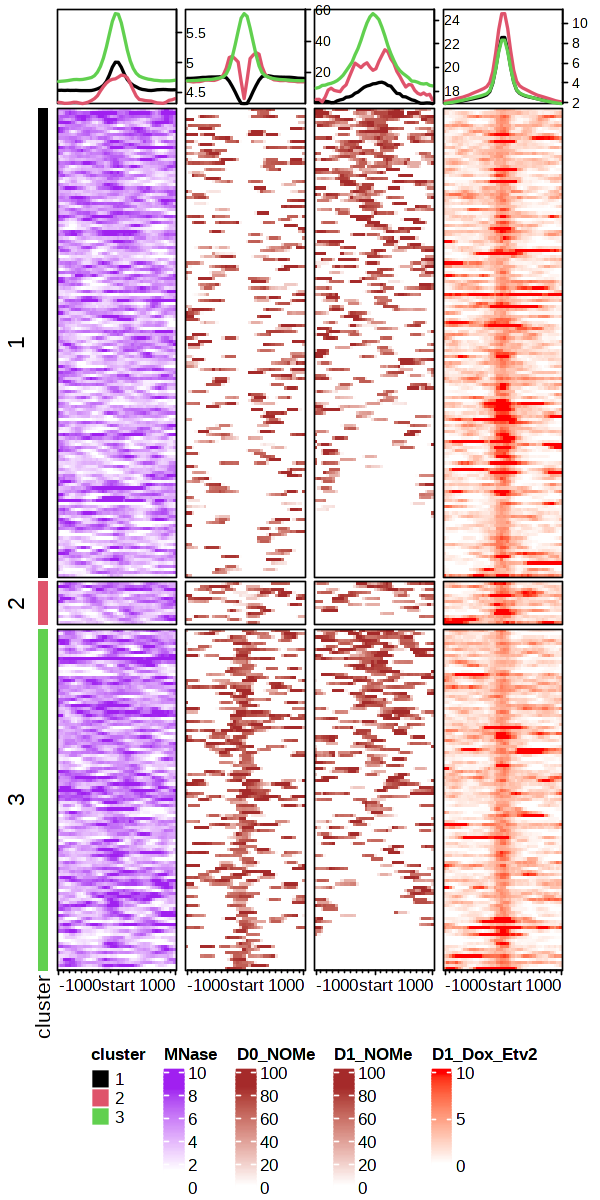

In [38]:
h <- Heatmap(sp_d0, col = structure(1:nlevels(sp_d0)), name = "cluster", width = unit(2, 'mm'), row_order = order(enriched_score(mat_d1_sub), decreasing = TRUE)) +
     EnrichedHeatmap(mat_sub, col = col_fun_mn, name = 'MNase', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_d0_sub, col = col_fun, name = 'D0_NOMe', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_d1_sub, col = col_fun_d1, name = 'D1_NOMe', top_annotation = ta, pos_line = FALSE) + 
     EnrichedHeatmap(mat_etv2, col = col_fun_etv2, name = 'D1_Dox_Etv2', top_annotation = ta, pos_line = FALSE) 


options(repr.plot.width = 5, repr.plot.height = 10)
draw(h, heatmap_legend_side = 'bottom', split = sp_d0)

# Enriched heatmap just for cluster 3 D0 regions(NOR)

In [39]:
mat_d0_nor <- mat_d0_sub[sp_d0 == 3,]
mat_d1_nor <- mat_d1_sub[sp_d0 == 3,]
mat_sub_nor <- mat_sub[sp_d0 == 3,]
mat_etv2_nor <- mat_etv2[sp_d0 == 3,]

Color annotation

In [40]:
col_fun <- colorRamp2(quantile(mat_d0_nor, c(0.01, 0.99)), c('white', 'brown'))
col_fun_mn <- colorRamp2(quantile(mat_sub_nor, c(0.01, 0.99)), c('white', 'navyblue'))
col_fun_d1 <- colorRamp2(quantile(mat_d1_nor, c(0.01, 0.99)), c('white', 'brown'))
col_fun_etv2 <- colorRamp2(quantile(mat_etv2_nor, c(0.01, 0.99)), c('white', 'red'))

In [41]:
sp_nor <- sp_d0[sp_d0 ==3]

Column annotation

In [42]:
ta <- HeatmapAnnotation(
  enriched = anno_enriched(gp = gpar(lty = 1, lwd = 2, col = 1:nlevels(sp_nor))
  #axis_param = list(facing = 'inside', at = -1000)
#ylim = c(-0.5,2)
  )
)

# Enriched heatmap 

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

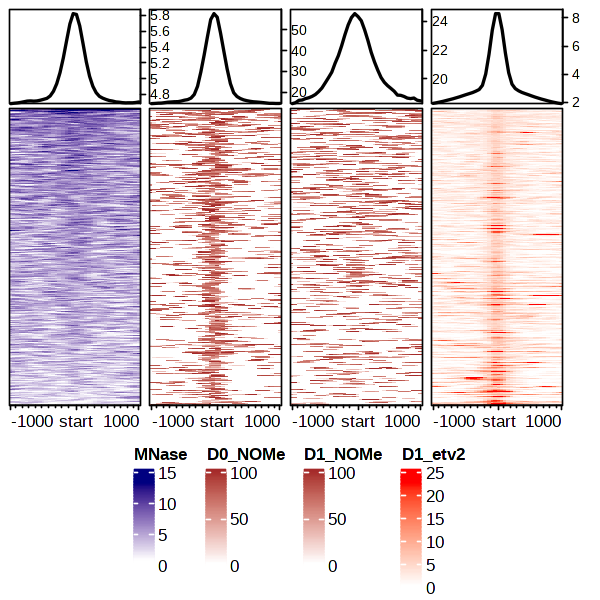

In [43]:
h <- EnrichedHeatmap(mat_sub_nor, col = col_fun_mn, name = 'MNase', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_d0_nor, col = col_fun, name = 'D0_NOMe', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_d1_nor, col = col_fun_d1, name = 'D1_NOMe', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_etv2_nor, col = col_fun_etv2, name = 'D1_etv2', top_annotation = ta, pos_line = FALSE)


options(repr.plot.width = 5, repr.plot.height = 5)
draw(h, heatmap_legend_side = 'bottom')

In [44]:
dat <- data.frame(cvg = colMeans(mat_d0_nor))

In [45]:
pos <- 1:nrow(dat) - (nrow(dat)+1)/2

In [46]:
df <- rbind(
  data.frame(
    cvg = colMeans(mat_d0_nor),
    norm = scale(colMeans(mat_d0_nor)),
    pos = pos,
    group = 'd0'
  ),
  data.frame(
    cvg = colMeans(mat_d1_nor),
    norm = scale(colMeans(mat_d1_nor)),
    pos = pos,
    group = 'd1'
  ),
  data.frame(
    cvg = colMeans(mat_sub_nor),
    norm = scale(colMeans(mat_sub_nor)),
    pos = pos,
    group = 'MNase'
  ),
   data.frame(
    cvg = colMeans(mat_etv2_nor),
    norm = scale(colMeans(mat_etv2_nor)),
    pos = pos,
    group = 'Etv2'
  )
)

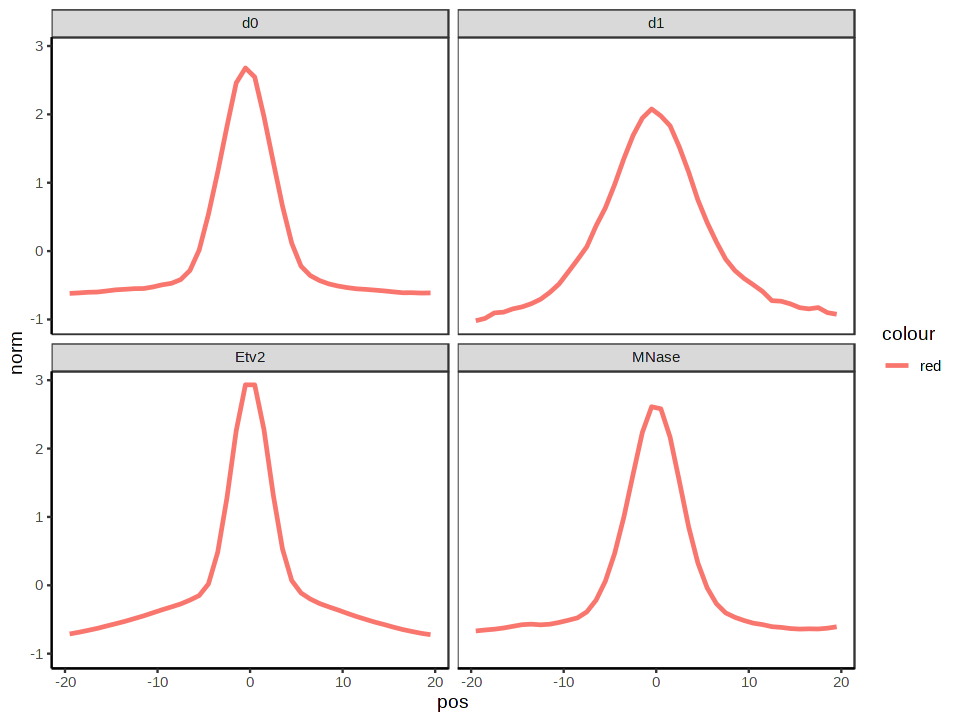

In [47]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df, aes(x = pos, y = norm, color = 'red')) + 
geom_line(size = 1)+  facet_wrap(~ group, ncol = 2)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



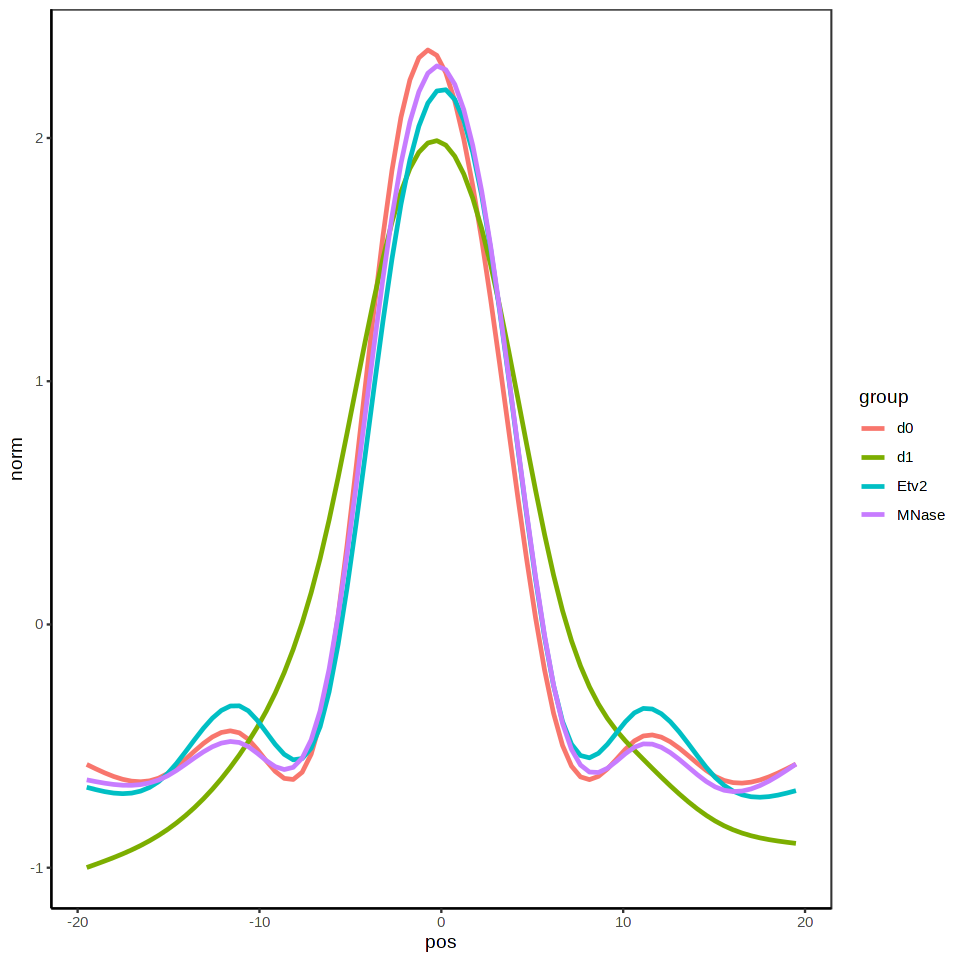

In [48]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(df, aes(x = pos, y = norm, color = group)) + 
geom_smooth(method = 'gam',se = FALSE)+  
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

We see that some NOR regions become NFR from D0 to D1 based on our NOMe seq data

In [49]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] aaRon_0.9.5                        limma_3.48.3                      
 [3] Gviz_1.36.2                        Repitools_1.38.0                  
 [5] devtools_2.4.2                     usethis_2.0.1                     
 [7] circ

In [50]:
Sys.time() - start_time0

Time difference of 41.95064 mins